<a href="https://colab.research.google.com/github/AbidYousuf/Abid-Yousuf/blob/main/BackPropagationRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BackPropagation From Scratch**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa','profile_score','lpa'])

In [ ]:
df.head()

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [ ]:
def initialize_parameters(layer_dims):
  np.random.seed(3)
  parameters={}
  L = len(layer_dims)
  for l in range(1,L):
    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [ ]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [ ]:
def linear_forward(A_prev,W,b):
  z = np.dot(W.T,A_prev)+b
  return z

In [ ]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    # print("A"+str(l-1)+": ", A_prev)
    # print("W"+str(l)+": ", Wl)
    # print("b"+str(l)+": ", bl)
    # print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    # print("A"+str(l)+": ", A)
    # print("**"*20)

  return A,A_prev

In [ ]:
X = df[['cgpa','profile_score']].values[0].reshape(2,1)
y = df[['lpa']].values[0][0]
# Parameter initialization
parameters = initialize_parameters([2,2,1])

# L_layer_forward(X, parameters)
y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


In [ ]:
y_hat = y_hat[0][0]

In [ ]:
y_hat

0.32000000000000006

In [ ]:
A1

array([[1.6],
       [1.6]])

In [ ]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

In [ ]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [ ]:
X = df[['cgpa','profile_score']].values[1].reshape(2,1)
y = df[['lpa']].values[1][0]


# L_layer_forward(X, parameters)
y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[7]
 [9]]
W1:  [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
b1:  [[0.00082267]
 [0.00082267]]
----------------------------------------
A1:  [[1.70612461]
 [1.70612461]]
****************************************
A1:  [[1.70612461]
 [1.70612461]]
W2:  [[0.111776]
 [0.111776]]
b2:  [[0.119136]]
----------------------------------------
A2:  [[0.50054357]]
****************************************


In [ ]:
y_hat = y_hat[0][0]

In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

In [ ]:
parameters

{'W1': array([[0.12356486, 0.12841729],
        [0.12356486, 0.12841729]]),
 'b1': array([[0.00324888],
        [0.00324888]]),
 'W2': array([[0.14248253],
        [0.14248253]]),
 'b2': array([[0.15148145]])}

In [ ]:
X = df[['cgpa','profile_score']].values[2].reshape(2,1)
y = df[['lpa']].values[2][0]


# L_layer_forward(X, parameters)
y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[ 6]
 [10]]
W1:  [[0.12356486 0.12841729]
 [0.12356486 0.12841729]]
b1:  [[0.00324888]
 [0.00324888]]
----------------------------------------
A1:  [[1.98028669]
 [2.0579255 ]]
****************************************
A1:  [[1.98028669]
 [2.0579255 ]]
W2:  [[0.14248253]
 [0.14248253]]
b2:  [[0.15148145]]
----------------------------------------
A2:  [[0.72685615]]
****************************************


In [ ]:
y_hat = y_hat[0][0]

In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

In [ ]:
parameters

{'W1': array([[0.13390237, 0.14564646],
        [0.13395418, 0.14573282]]),
 'b1': array([[0.0049718 ],
        [0.00498044]]),
 'W2': array([[0.16336721],
        [0.16418601]]),
 'b2': array([[0.1747323]])}

In [ ]:
X = df[['cgpa','profile_score']].values[3].reshape(2,1)
y = df[['lpa']].values[3][0]


# L_layer_forward(X, parameters)
y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[ 5]
 [12]]
W1:  [[0.13390237 0.14564646]
 [0.13395418 0.14573282]]
b1:  [[0.0049718 ]
 [0.00498044]]
----------------------------------------
A1:  [[2.2819338 ]
 [2.48200657]]
****************************************
A1:  [[2.2819338 ]
 [2.48200657]]
W2:  [[0.16336721]
 [0.16418601]]
b2:  [[0.1747323]]
----------------------------------------
A2:  [[0.9550362]]
****************************************


In [ ]:
y_hat = y_hat[0][0]

In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

In [ ]:
parameters

{'W1': array([[0.14544557, 0.17335014],
        [0.14569309, 0.17390621]]),
 'b1': array([[0.00728044],
        [0.00732822]]),
 'W2': array([[0.19095562],
        [0.19419329]]),
 'b2': array([[0.20628322]])}

**Epoch implementation**

In [ ]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 10

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch = ',i+1,'Loss = ',np.array(Loss).mean())

parameters

Epoch =  1 Loss =  25.321744156025517
Epoch =  2 Loss =  18.320004165722047
Epoch =  3 Loss =  9.473661050729628
Epoch =  4 Loss =  3.2520938634031613
Epoch =  5 Loss =  1.3407132589299962
Epoch =  6 Loss =  1.1726178458115697
Epoch =  7 Loss =  1.2331289135532644
Epoch =  8 Loss =  1.2686856723180788
Epoch =  9 Loss =  1.282007891421992
Epoch =  10 Loss =  1.2866806711744867


{'W1': array([[0.251385  , 0.42030991],
        [0.26250745, 0.45149331]]),
 'b1': array([[0.02847052],
        [0.03098528]]),
 'W2': array([[0.42075476],
        [0.49891207]]),
 'b2': array([[0.50135566]])}

**BackProp Using Keras Library**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa','profile_score','lpa'])

In [ ]:
df.head()

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(2,activation='linear',input_dim=2))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.53052926,  0.8479229 ],
        [-0.8502451 ,  0.6541214 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.2577138 ],
        [ 0.52246714]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
new_weights = [np.array([[0.1,0.1],
        [0.1,0.1]],dtype=np.float32),
    np.array([0.,0.],dtype=np.float32),
    np.array([[1.0],[1.0]],dtype=np.float32),
    np.array([0.],dtype=np.float32)]

In [ ]:
model.set_weights(new_weights)

In [ ]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history = model.fit(df.iloc[:,0:-1].values,df['lpa'].values,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 3.9067 - accuracy: 0.0000e+00 - val_loss: 12.6705 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 32ms/step - loss: 3.7705 - accuracy: 0.0000e+00 - val_loss: 12.3839 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 35ms/step - loss: 3.6371 - accuracy: 0.0000e+00 - val_loss: 12.1004 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 33ms/step - loss: 3.5065 - accuracy: 0.0000e+00 - val_loss: 11.8200 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 34ms/step - loss: 3.3788 - accuracy: 0.0000e+00 - val_loss: 11.5429 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 40ms/step - loss: 3.2540 - accuracy: 0.0000e+00 - val_loss: 11.2693 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 33ms/step - loss: 3.1322 - accuracy: 0.0000e+00 - val_loss: 1

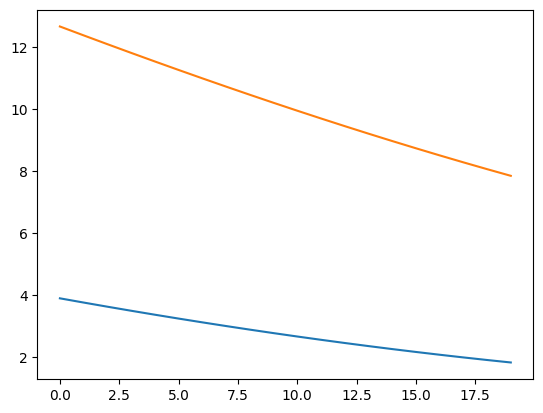

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**BackProp Using Classification problem**

In [ ]:
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])


In [ ]:
df.head()

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [ ]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [ ]:
# Utility Functions
def sigmoid(Z):

  A = 1/(1+np.exp(-Z))

  return A

In [ ]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)

  return A

In [ ]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev


In [ ]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.613402628898913


{'W1': array([[0.10000513, 0.10000513],
        [0.10000513, 0.10000513]]),
 'b1': array([[6.41054186e-07],
        [6.41054186e-07]]),
 'W2': array([[0.10003815],
        [0.10003815]]),
 'b2': array([[0.100084]])}

# **Epoch Implemetation**

In [ ]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.7103199085929446
Epoch -  2 Loss -  0.6991702892802629
Epoch -  3 Loss -  0.6991679314811485
Epoch -  4 Loss -  0.6991655746710999
Epoch -  5 Loss -  0.6991632188496667
Epoch -  6 Loss -  0.699160864016399
Epoch -  7 Loss -  0.6991585101708473
Epoch -  8 Loss -  0.6991561573125619
Epoch -  9 Loss -  0.6991538054410936
Epoch -  10 Loss -  0.6991514545559935
Epoch -  11 Loss -  0.6991491046568126
Epoch -  12 Loss -  0.6991467557431024
Epoch -  13 Loss -  0.6991444078144144
Epoch -  14 Loss -  0.6991420608703007
Epoch -  15 Loss -  0.6991397149103132
Epoch -  16 Loss -  0.6991373699340042
Epoch -  17 Loss -  0.6991350259409265
Epoch -  18 Loss -  0.6991326829306324
Epoch -  19 Loss -  0.6991303409026751
Epoch -  20 Loss -  0.699127999856608
Epoch -  21 Loss -  0.6991256597919842
Epoch -  22 Loss -  0.6991233207083575
Epoch -  23 Loss -  0.6991209826052818
Epoch -  24 Loss -  0.699118645482311
Epoch -  25 Loss -  0.6991163093389996
Epoch -  26 Loss -  0.699113974174902

{'W1': array([[0.09994267, 0.09984548],
        [0.09994272, 0.09984548]]),
 'b1': array([[-3.38405750e-05],
        [-3.38419977e-05]]),
 'W2': array([[0.09920806],
        [0.09920816]]),
 'b2': array([[0.09915209]])}

**Using Keras Library**

In [ ]:
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])


In [ ]:
df.head()

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [ ]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.10650682,  1.2004236 ],
        [ 0.66589034,  1.033764  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.47265399],
        [0.51318204]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
new_weights = [np.array([[0.1,0.1],
        [0.1,0.1]],dtype=np.float32),
    np.array([0.,0.],dtype=np.float32),
    np.array([[1.0],[1.0]],dtype=np.float32),
    np.array([0.],dtype=np.float32)]

In [ ]:
model.set_weights(new_weights)

In [ ]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
model.fit(df.iloc[:,0:-1].values,df['placed'].values,epochs=50,batch_size=1)

Epoch 1/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8450
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8400
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.8354
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8317
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: 0.8229
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8182
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8138
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8093
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8059
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8034
Epoch 11/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7983
Epoch 12/50
4/4 [==============================] - 0s 8ms/step - loss: 0.7948
Epoch 13/50
4/4 [==============================] - 0s 13ms/step - loss:

# **MLP Memoization**

In [ ]:
def fib(n):
  if n==0 or n==1:
    return 1
  else:
    return fib(n-1)+fib(n-2)
#Time complexity O(2^n)

In [ ]:
fib(5)

8

In [ ]:
def fib(n,dic):
  if n in dic:
    return dic[n]
  else:
    dic[n] = fib(n-1,dic)+fib(n-2,dic)
    return dic[n]

In [ ]:
import time

In [ ]:
start= time.time()
dic = {0:1,1:1}
fib(100,dic)
print(time.time()-start)

0.020456790924072266
